In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image
from pathlib import Path
from matplotlib.patches import Rectangle
from scipy.io import loadmat

# DevKit

In [2]:
devkit_path = Path('devkit/')
train_path = Path('cars_train/')
test_path = Path('cars_test/')

In [3]:
os.listdir(devkit_path)

['train_perfect_preds.txt',
 'README.txt',
 'eval_train.m',
 'cars_test_annos.mat',
 'cars_meta.mat',
 'cars_train_annos.mat']

## `README.txt`

```
This file gives documentation for the cars 196 dataset.
(http://ai.stanford.edu/~jkrause/cars/car_dataset.html)

----------------------------------------
Metadata/Annotations
----------------------------------------
Descriptions of the files are as follows:

-cars_meta.mat:
  Contains a cell array of class names, one for each class.

-cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:
    bbox_x1: Min x-value of the bounding box, in pixels
    bbox_x2: Max x-value of the bounding box, in pixels
    bbox_y1: Min y-value of the bounding box, in pixels
    bbox_y2: Max y-value of the bounding box, in pixels
    class: Integral id of the class the image belongs to.
    fname: Filename of the image within the folder of images.

-cars_test_annos.mat:
  Same format as 'cars_train_annos.mat', except the class is not provided.
```

From the `README.txt` file, we have the three meta data filles oppened bellow

In [4]:
cars_meta = loadmat(devkit_path/'cars_meta.mat')
cars_train_annos = loadmat(devkit_path/'cars_train_annos.mat')
cars_test_annos = loadmat(devkit_path/'cars_test_annos.mat')

## Loading Labels

In [5]:
labels = [c for c in cars_meta['class_names'][0]]
labels = pd.DataFrame(labels, columns=['labels'])
labels.head()

,labels
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


## Loading Cars Train

In [6]:
frame = [[i.flat[0] for i in line] for line in cars_train_annos['annotations'][0]]
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'class', 'fname']
df_train = pd.DataFrame(frame, columns=columns)
df_train['class'] = df_train['class']-1 # Python indexing starts on zero.
df_train['fname'] = [train_path/f for f in df_train['fname']] #  Appending Path
df_train.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname
0,39,116,569,375,13,cars_train/00001.jpg
1,36,116,868,587,2,cars_train/00002.jpg
2,85,109,601,381,90,cars_train/00003.jpg
3,621,393,1484,1096,-123,cars_train/00004.jpg
4,14,36,133,99,105,cars_train/00005.jpg


### Merging labels

In [7]:
df_train = df_train.merge(labels, left_on='class', right_index=True)
df_train = df_train.sort_index()
df_train.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,fname,labels
0,39,116,569,375,13,cars_train/00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,2,cars_train/00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,90,cars_train/00003.jpg,Dodge Dakota Club Cab 2007
4,14,36,133,99,105,cars_train/00005.jpg,Ford F-450 Super Duty Crew Cab 2012
5,259,289,515,416,122,cars_train/00006.jpg,Geo Metro Convertible 1993


## Loading Cars Test

In [8]:
frame = [[i.flat[0] for i in line] for line in cars_test_annos['annotations'][0]]
columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'fname']
df_test = pd.DataFrame(frame, columns=columns)
df_test['fname'] = [test_path/f for f in df_test['fname']] #  Appending Path
df_test.head()

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,fname
0,30,52,246,147,cars_test/00001.jpg
1,100,19,576,203,cars_test/00002.jpg
2,51,105,968,659,cars_test/00003.jpg
3,67,84,581,407,cars_test/00004.jpg
4,140,151,593,339,cars_test/00005.jpg


## Displaying Image

In [9]:
# Returns (Image, title, rectangle patch) for drawing
def get_assets(df, i):
    is_train = df is df_train
    folder = train_path if is_train else test_path
    image = Image.open(df['fname'][i])
    title = df['labels'][i] if is_train else 'Unclassified'

    xy = df['bbox_x1'][i], df['bbox_y1'][i]
    width = df['bbox_x2'][i] - df['bbox_x1'][i]
    height = df['bbox_y2'][i] - df['bbox_y1'][i]
    rect = Rectangle(xy, width, height, fill=False, color='r', linewidth=2)
    
    return (image, title, rect)

In [10]:
def display_image(df, i):
    image, title, rect = get_assets(df, i)
    print(title)

    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.gca().add_patch(rect)

Audi TTS Coupe 2012


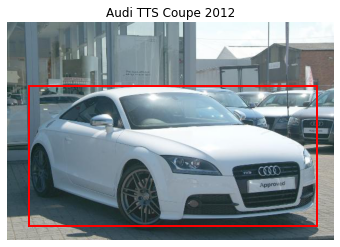

In [11]:
display_image(df_train, 0)

## Displaying Range Image

In [12]:
def display_range(end, start = 0):

    n = end - start
    fig, ax = plt.subplots(n, 2, figsize=(15, 5*end))

    for i in range(start, end):
        line = i - start
        
        im, title, rect = get_assets(df_train, i)
        sub = ax[line, 0]
        sub.imshow(im)
        sub.axis('off')
        sub.set_title(title)
        sub.add_patch(rect)
        
        im, title, rect = get_assets(df_test, i)
        sub = ax[line, 1]
        sub.imshow(im)
        sub.axis('off')
        sub.set_title(title)
        sub.add_patch(rect)
        
    plt.show()
    
def display_train (end, start = 0):
    
    n = end - start
    fig, ax = plt.subplots(n, 2, figsize=(15, 5*end))

    for i in range(9):
        line = i - start
        
        im, title, rect = get_assets(df_train, i)
        sub = ax[line, 0]
        sub.imshow(im)
        sub.axis('off')
        sub.set_title(title)
        sub.add_patch(rect)
               
    plt.show()
    
def display_test (end, start = 0):
        
    n = end - start
    fig, ax = plt.subplots(n, 2, figsize=(15, 5*end))
        
    for i in range(9):
        line = i - start
        
        im, title, rect = get_assets(df_test, i)
        sub = ax[line, 0]
        sub.imshow(im)
        sub.axis('off')
        sub.set_title(title)
        sub.add_patch(rect)
        
    plt.show()


In [13]:
# Display small grid of Train Images


## Cars' Distribution

In [14]:
freq_labels = df_train.groupby('labels').count()[['class']]
freq_labels = freq_labels.rename(columns={'class': 'count'})
freq_labels = freq_labels.sort_values(by='count', ascending=False)
freq_labels.head()

,count
labels,
GMC Savana Van 2012,68
Chrysler 300 SRT-8 2010,49
Mercedes-Benz 300-Class Convertible 1993,48
Mitsubishi Lancer Sedan 2012,48
Jaguar XK XKR 2012,47


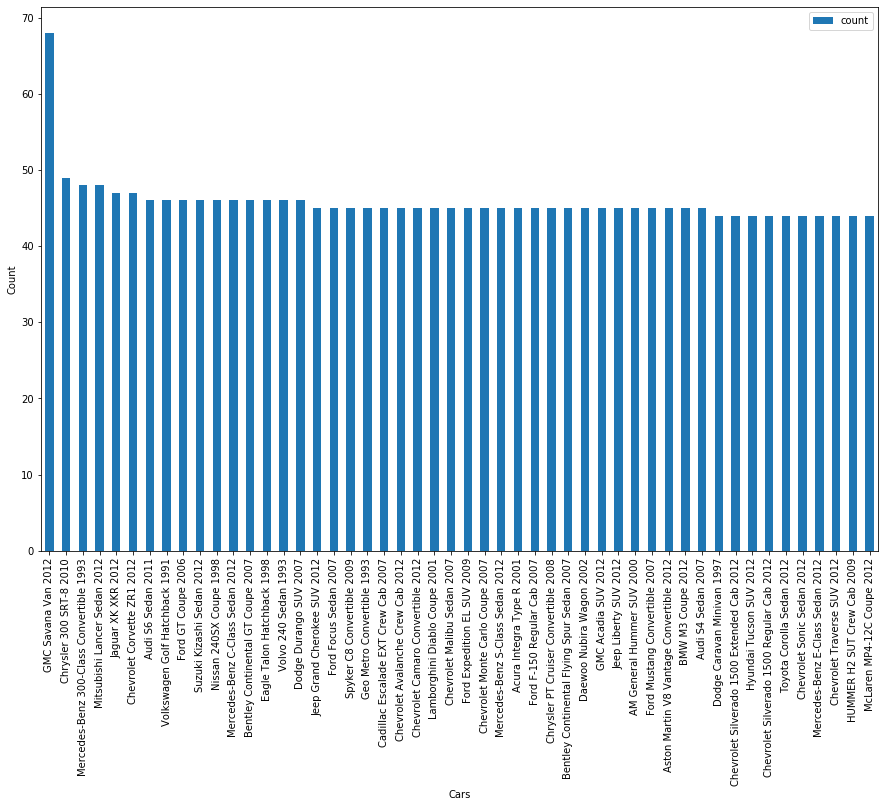

In [15]:
freq_labels.head(50).plot.bar(figsize=(15,10))
plt.xticks(rotation=90);
plt.xlabel("Cars");
plt.ylabel("Count");

## Run Training Through Machine Learning Model

In [16]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'tensorflow'